In [1]:
from sdss_stochastic import SDSS_stochastic
import utility as sds_util
import plot as sds_plt

In [2]:
# CORE GRID
core = SDSS_stochastic(sim_type = "core", N_grid = 5000)
core.grid(core.r_cmb, "gauss_leg", calc_sph_d = True)
core.data()
core.condtab()
core.semivar(model_lags = 'all', model = "exponential", max_dist = 4500, lag_length = 50, zero_nugget = True)


____semi-variogram setup___

Number of data used: 9420600
Max data distance: 4499.972 km
Lag length chosen: 50.0 km
Number of lags: 89
Number of modelling lags: all

Semi-variogram model determined, starting LUT computation



In [3]:
# SAT GRID
sat = SDSS_stochastic(sim_type = "sat", N_grid = 3010)
sat.grid(sat.r_sat, "equal_area", calc_sph_d = False)
sat.data()

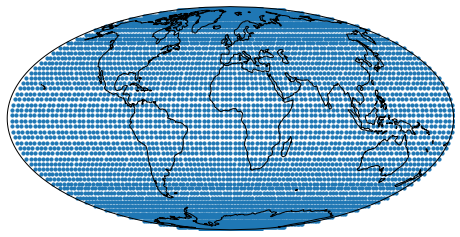

In [9]:
#%% PLOT GRID
sds_util.plot_cartopy_global(core.lat, core.lon, cmap = 'PuOr_r', title="Prior radial core information")

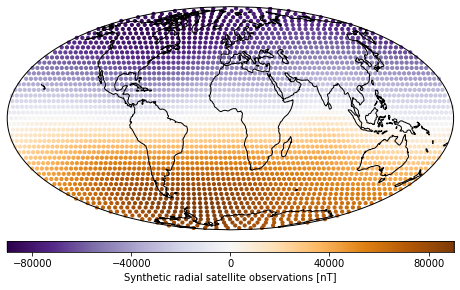

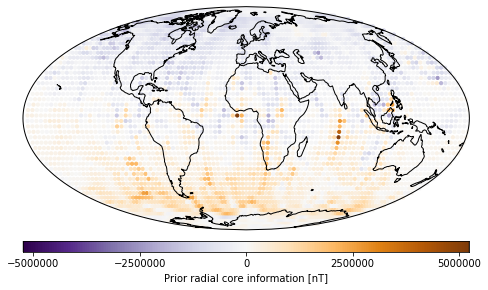

In [5]:
#%% PLOT SYNTHETIC DATA
sds_util.plot_cartopy_global(sat.lat, sat.lon, data=sat.data, cmap = 'PuOr_r', title="Synthetic radial satellite observations", scale_uneven = False)
sds_util.plot_cartopy_global(core.lat, core.lon, data=core.data, cmap = 'PuOr_r', title="Prior radial core information", scale_uneven = False)

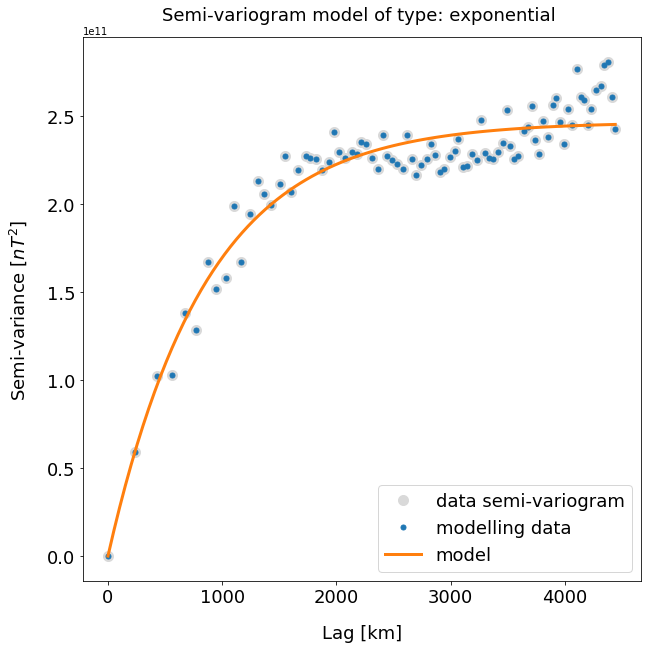

In [6]:
#%% PLOT SEMI-VARIOGRAM
semivar = sdssim_semivar = {"semi-variogram LUT":core.sv_lut, "total data lags":core.lags, "total data sv":core.pics, "model data lags":core.lags_model, "model data sv":core.pics_model, "model names":core.model_names, "sv model y":core.sv_curve, "sv model x":core.lags_sv_curve, "sv model":core.model, "a":core.a, "C0":core.C0, "C1":core.C1, "C2":core.C2, "C3":core.C3, "n_lags":core.n_lags, "max_cloud":core.max_cloud, "sph_d_sorted":core.sph_d_sorted, "sort_d":core.sort_d}
sds_plt.plots('model_semi_variogram_new', semivar)

In [7]:
print(core)


______current attributes______

a:                     2578.4132121786547
r_cmb:                 3480.0
r_sat:                 6721.2
rad:                   0.017453292519943295
mu0:                   1.2566370614359172
N_grid:                5000
N_SH:                  60
sim_type:              core
r_grid:                3480.0
grid_type:             gauss_leg
sph_d:                 (5000, 5000), Max/Min: [10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.74, 10932.7

In [8]:
print(sat)

TypeError: unsupported format string passed to matrix.__format__